# Multinomial Classification using MLP-NN

The idea is motivated from maximum likelihood estimatation charateristic of multiclass logistic regression prediction which makes prediction based on input-output probability. [Preprocessing]It starts from converting continuous pathloss values into discrete categorical value(Range k). Based on k range categorical Y values, running logistic regression using sigmoid activation function and softmax loss function for multiclass classification.
The output consists of not only Y category value but also probability distribution along the whole range of Y categories that we could find out how confidence level for certain prediction. 

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [26]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

from utils import data_loader_from_csv, build_dataframe

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


range1:75~96
range2:96~117
range3:117~131
range4:131~144
range5:144~180


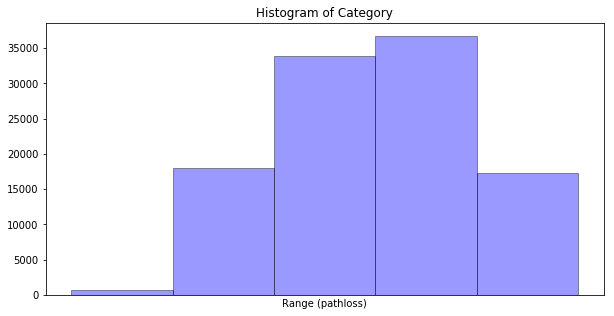

In [55]:
%autoreload
k = 5
X_train, y_train, X_val, y_val = data_loader_from_csv('../data/PLdata_iksan_sp_400.csv',k,'kmeans')

In [56]:
model = MLPClassifier(solver='adam', activation='logistic', alpha=1e-5,
                        hidden_layer_sizes=(100,), max_iter=2000, tol=0.00001)
model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=1e-05,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [57]:
probTab = build_dataframe(model, y_hat, y_val, cY, X_val, k)

sample_idx = 110
print("sample data: " + str(sample_idx) + "th")
print(probTab.loc[sample_idx])
print()
print("Classification Accuracy: " + str(accuracy_score(y_val,y_hat)*100) + '%')

sample data: 110th
range1                  9%
range2                 63%
range3                 22%
range4                  4%
range5                  0%
X(log distance)    2.36115
prediction               2
real value               3
Name: 110, dtype: object

Classification Accuracy: 41.762003000750184%


In [58]:
print("Misclassified Data")
probTab.loc[probTab['prediction'] != probTab['real value']]

Misclassified Data


,range1,range2,range3,range4,range5,X(log distance),prediction,real value
4,1%,67%,30%,0%,0%,1.471990,2,3
7,1%,68%,30%,0%,0%,1.480357,2,3
8,1%,69%,29%,0%,0%,1.490601,2,3
9,1%,69%,29%,0%,0%,1.493445,2,3
10,1%,69%,29%,0%,0%,1.497865,2,3
11,1%,69%,29%,0%,0%,1.498134,2,3
12,1%,69%,29%,0%,0%,1.499468,2,3
13,1%,69%,29%,0%,0%,1.499723,2,3
14,1%,69%,28%,0%,0%,1.501617,2,3
15,1%,69%,28%,0%,0%,1.501837,2,3
